In [1]:
# Import modules
import pandas as pd
from zipfile import ZipFile 
import gzip, collections, random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

path = 'encode/20210418_hg19_8416ex'
# path = 'encode/legacy'

In [2]:
# # Unzip data
# if os.path.isdir('extracted_bed'):
#     print('Files present.')
# else:
#     for file_ in tqdm(os.listdir('data')):
#         #path_to_file_to_be_extracted
#         ip = 'data/'+file_
#         #output file to be filled
#         op = open("extracted_bed/"+file_.split('.')[0]+"1.bed","w")

#         with gzip.open(ip,"rb") as ip_byte:
#             op.write(ip_byte.read().decode("utf-8"))
#             op.close()

Files present.


In [13]:
# Prepare metadata
metadata = pd.read_csv(path+'/metadata.tsv', sep='\t')
metadata_ = metadata[['File accession', 'Biosample term name', 'Biosample type', 'File assembly', 'Experiment target']]
metadata_ = metadata_[metadata_['Biosample type']=='cell line']
metadata_

,File accession,Biosample term name,Biosample type,File assembly,Experiment target
0,ENCFF001VPU,MCF 10A,cell line,hg19,FOS-human
1,ENCFF002CYY,MCF 10A,cell line,hg19,FOS-human
2,ENCFF988HJD,MCF 10A,cell line,hg19,FOS-human
3,ENCFF215QRX,MCF 10A,cell line,hg19,FOS-human
4,ENCFF886CAV,MCF 10A,cell line,hg19,FOS-human
...,...,...,...,...,...
8411,ENCFF883SHN,K562,cell line,hg19,MTA3-human
8412,ENCFF120WQF,K562,cell line,hg19,MTA3-human
8413,ENCFF976RBY,K562,cell line,hg19,MTA3-human
8414,ENCFF326WKP,K562,cell line,hg19,MTA3-human


In [20]:
len(np.unique(metadata_['Experiment target']))

664

In [3]:
# Filte duplicate tf-celline pairs
cellline_dict = collections.Counter(metadata_['Biosample term name'])
master_record = pd.DataFrame()
for line in tqdm(cellline_dict):
    #print(line, cellline_dict[i])
    df = metadata_[metadata_['Biosample term name']==line]
    tfs = collections.Counter(df['Experiment target'])
    for tf in tfs:
        df_ = df[df['Experiment target']==tf]
        #for acc_ in df_['File accession'].values:
        master_record = master_record.append(df_[df_['File accession']==random.choice(df_['File accession'].values)], ignore_index=True)
        #if acc_+'.bed' in os.listdir('extracted_bed'):
            #
            #break 
print()
print(master_record.shape)

100%|██████████| 79/79 [00:07<00:00, 11.21it/s]
(1368, 5)



In [11]:
bed_path = path+'/data'
means=[]
for file_ in tqdm(os.listdir(bed_path)):
    op = open('.temp', 'w')
    # print(file_)s
    with gzip.open(bed_path+'/'+file_, "rb") as ip_byte:
        op.write(ip_byte.read().decode("utf-8"))
        op.close()
    bed = pd.read_csv('.temp', sep='\t', header=None)
    peak_len = abs(bed[1].values-bed[2].values)
    means.append(np.mean(peak_len))
    os.remove('.temp')
plt.hist(means, ins=30)
    # print(peak_len)
    # print(bed.head())

 99%|█████████▉| 8364/8416 [2:08:06<00:47,  1.09it/s]


KeyboardInterrupt: 

  1.20it/s]ENCFF316KPE 349.82283666666666
 78%|███████▊  | 1069/1368 [12:36<04:02,  1.23it/s]ENCFF440XJQ 323.99486
ENCFF856LJI 360.0
 78%|███████▊  | 1071/1368 [12:38<03:42,  1.34it/s]ENCFF680MTL 343.99913333333336
ENCFF725VSD 283.50248516915184
 79%|███████▉  | 1078/1368 [12:46<04:41,  1.03it/s]ENCFF243GQS 355.89351
ENCFF401UWO 345.2261287934863
 79%|███████▉  | 1080/1368 [12:47<04:05,  1.18it/s]ENCFF818OAI 335.97788333333335
ENCFF019SJB 328.6705686910833
 79%|███████▉  | 1086/1368 [12:53<03:38,  1.29it/s]ENCFF262JCU 329.99187
ENCFF484OQM 336.0131578947368
 80%|███████▉  | 1092/1368 [12:57<03:25,  1.34it/s]ENCFF881ZVL 339.95874333333336
ENCFF429ZIY 320.0
ENCFF519CSQ 280.0
 80%|███████▉  | 1094/1368 [12:58<03:14,  1.41it/s]ENCFF212LGF 363.8558733333333
ENCFF026FRV 357.87702656088305
 80%|████████  | 1100/1368 [13:06<05:54,  1.32s/it]ENCFF558KUD 303.9964033333333
ENCFF454YSP 341.5669734151329
 81%|████████  | 1109/1368 [13:13<02:59,  1.44it/s]ENCFF290YYY 343.02018179850666
ENCFF555SDJ 3

(array([820., 488.,  39.,   7.,   8.,   3.,   2.,   0.,   0.,   1.]),
 array([ 112.44939655,  388.92456815,  665.39973975,  941.87491134,
        1218.35008294, 1494.82525454, 1771.30042614, 2047.77559774,
        2324.25076934, 2600.72594094, 2877.20111254]),
 <BarContainer object of 10 artists>)

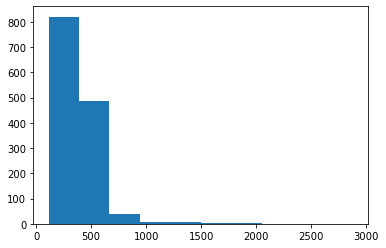

In [9]:
means=[]
bed_path = path+'/data'
for acc in tqdm(master_record['File accession'].values):
    op = open('.temp', 'w')
    with gzip.open(bed_path+'/'+acc+'.bed.gz', "rb") as ip_byte:
        op.write(ip_byte.read().decode("utf-8"))
        op.close()
    bed = pd.read_csv('.temp', sep='\t', header=None)
    peak_len = abs(bed[1].values-bed[2].values)
    means.append(np.mean(peak_len))
    # os.remove('.temp')
    print(acc, np.mean(peak_len))


(array([ 44., 241., 535., 290., 133.,  65.,  25.,   7.,   7.,   3.,   2.,
          2.,   5.,   1.,   2.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 112.44939655,  204.60778708,  296.76617761,  388.92456815,
         481.08295868,  573.24134921,  665.39973975,  757.55813028,
         849.71652081,  941.87491134, 1034.03330188, 1126.19169241,
        1218.35008294, 1310.50847348, 1402.66686401, 1494.82525454,
        1586.98364508, 1679.14203561, 1771.30042614, 1863.45881667,
        1955.61720721, 2047.77559774, 2139.93398827, 2232.09237881,
        2324.25076934, 2416.40915987, 2508.56755041, 2600.72594094,
        2692.88433147, 2785.042722  , 2877.20111254]),
 <BarContainer object of 30 artists>)

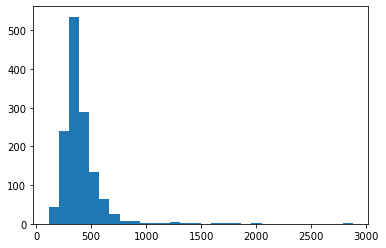

In [10]:
plt.hist(means, bins=30)

100%|██████████| 156/156 [01:01<00:00,  2.54it/s]
DescribeResult(nobs=156, minmax=(127.5861748723033, 2102.914861788618), mean=412.4333663476857, variance=77097.34694958171, skewness=3.2308040457084832, kurtosis=12.936581752971057)


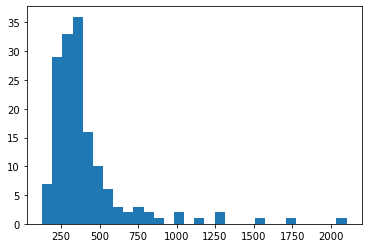

In [158]:
means=[]
for acc in tqdm(master_record['File accession'].values):
    try:
        data = pd.read_csv('encode/20210418_hg19_8461ex/data/'+acc+'.bed', sep='\t', header=None)
        list_ = abs(data[1].values-data[2].values)
        means.append(np.mean(list_))
    except:
        print(acc)
plt.hist(means, bins=30)
print(stats.describe(means))

In [19]:
means=[]
for acc in tqdm(master_record['File accession'].values):
    try:
        data = pd.read_csv('encode/20210418_hg19_8461ex/data/'+acc+'.bed', sep='\t', header=None)
        list_ = abs(data[1].values-data[2].values)
        means.append(np.mean(list_))
    except:
        pass
        #print(acc)
    print(means)
plt.hist(means, bins=30)
print(stats.describe(means))

 33%|███▎      | 437/1312 [00:00<00:00, 4369.83it/s]ENCFF255HIR
ENCFF199WGD
ENCFF215YWS
ENCFF208TRU
ENCFF760IFZ
ENCFF869LKG
ENCFF128GGA
ENCFF001VET
ENCFF603MKX
ENCFF043OJL
ENCFF294BZJ
ENCFF562LQW
ENCFF969EMZ
ENCFF116EXQ
ENCFF734EMB
ENCFF308ISM
ENCFF490VYC
ENCFF882PND
ENCFF790EAG
ENCFF590VTP
ENCFF359FUJ
ENCFF569JWR
ENCFF632MBO
ENCFF552GWT
ENCFF510UIU
ENCFF372FLW
ENCFF518BAN
ENCFF109YBE
ENCFF100ERQ
ENCFF332JOV
ENCFF874IMP
ENCFF144FCI
ENCFF191TQD
ENCFF925ZGX
ENCFF002CPJ
ENCFF017OSU
ENCFF409QJU
ENCFF898MUV
ENCFF456YII
ENCFF692VTI
ENCFF551KNM
ENCFF544NXC
ENCFF063WXY
ENCFF269LZJ
ENCFF257OPZ
ENCFF496UYK
ENCFF002CHV
ENCFF306UPG
ENCFF763SSU
ENCFF095FHM
ENCFF312KOJ
ENCFF270KWZ
ENCFF876BBG
ENCFF492EAL
ENCFF314KVP
ENCFF685WLQ
ENCFF709QKK
ENCFF706HYT
ENCFF606WUV
ENCFF853SOB
ENCFF496AHM
ENCFF911SLA
ENCFF047ZBU
ENCFF468MFY
ENCFF099MXC
ENCFF628ZZL
ENCFF951TLZ
ENCFF513RIQ
ENCFF602KMQ
ENCFF643OWO
ENCFF389NMB
ENCFF249QCH
ENCFF583BIS
ENCFF833VKG
ENCFF920WQE
ENCFF779XER
ENCFF122PLB
ENCFF936XYD
ENCFF957YRU


ValueError: The input must not be empty.

In [9]:
means = []
for file_ in tqdm(os.listdir('encode/legacy/extracted_bed')):
    data = pd.read_csv('encode/legacy/extracted_bed/'+file_, sep='\t', header=None)
    list_ = abs(data[1].values-data[2].values)
    #print(stats.describe(list_))
    means.append(np.mean(list_))
    #plt.hist(list_, bins=20)s

100%|██████████| 811/811 [04:44<00:00,  2.85it/s]


DescribeResult(nobs=811, minmax=(127.5861748723033, 2877.201112537441), mean=367.75839745437264, variance=41594.8637611224, skewness=6.1273635202428505, kurtosis=58.49676832852068)


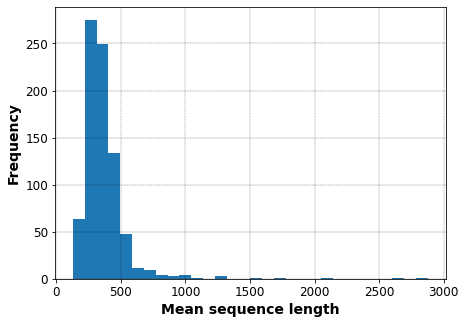

In [18]:
fig, ax = plt.subplots(1, figsize=(7,5))
ax.hist(means, bins=30)
ax.set_xlabel('Mean sequence length', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
#ax.set_xticklabels(dates)
ax.grid(color='black', ls = '-.', lw = 0.25)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
print(stats.describe(means))

In [58]:
# from scipy.interpolate import make_interp_spline

# import datetime
# start = datetime.datetime.strptime("28-03-2021", "%d-%m-%Y")
# end = datetime.datetime.strptime("17-04-2021", "%d-%m-%Y")
# date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

# times = [49, 78, 51, 75, 50, 57, 34, 20, 17, 23, 39, 15, 10, 0, 21, 39, 26, 33, 60, 19]
# times_=list(reversed(times))
# times_

# dates = []
# for date in date_generated:
#     dates.append(date.strftime("%d-%m-%Y"))

# X_Y_Spline = make_interp_spline(np.linspace(0,19,20), times_)
# X_ = np.linspace(np.linspace(0,19,20).min(), np.linspace(0,19,20).max(), 500)
# Y_ = X_Y_Spline(X_)

# fig, ax = plt.subplots(1, figsize=(9,5))
# ax.plot(dates, times_, marker='o', color='r')
# ax.set_xlabel('Date', fontsize=14, fontweight='bold')
# ax.set_ylabel('Time on call (min)', fontsize=14, fontweight='bold')
# ax.set_xticklabels(dates)

# # # # We change the fontsize of minor ticks label 
# ax.tick_params(axis='x', which='major', labelsize=12, rotation=60)
# ax.tick_params(axis='y', which='major', labelsize=12)
# ax.grid(color='b', ls = '-.', lw = 0.25)

# ax.set_title('Phone record analysis (20 days)', fontsize=14, fontweight='bold')
# plt.savefig('phonecall.jpg', dpi=600, transparent=False, optimize=True,bbox_inches='tight')